In [41]:
import copy
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from matplotlib import pyplot as plt

In [17]:
df = pd.read_csv('../dataset.csv')

/var/folders/jq/94zph4td255684v2hbsq4f340000gn/T/ipykernel_15765/183770946.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset.csv')


In [3]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [4]:
df['class'].value_counts()

class
MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: count, dtype: int64

In [18]:
df = df[['H', 'diameter', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'moid', 'class', 'pha']]
dropped_df = df.dropna(how='any', axis=0)

In [75]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

H            0.653400
diameter    85.789714
e            0.000000
a            0.000000
q            0.000000
i            0.000000
om           0.000000
w            0.000000
ma           0.000104
ad           0.000417
n            0.000000
tp           0.000000
moid         2.078300
class        0.000000
pha          2.078300
dtype: float64

In [76]:
df['diameter']

0         939.400
1         545.000
2         246.596
3         525.400
4         106.699
           ...   
958519        NaN
958520        NaN
958521        NaN
958522        NaN
958523        NaN
Name: diameter, Length: 958524, dtype: float64

In [19]:
print(df.shape)
print(dropped_df.shape)

(958524, 15)
(132045, 15)


In [21]:
filtered_data = dropped_df[['H', 'diameter', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'moid', 'class']]

categorical_features = ['class']
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[('cat_trans', categorical_transformer, categorical_features)],
    remainder='passthrough'
)

clf = Pipeline(
    steps=[('preprocess', preprocessor), ('classifier', tree.DecisionTreeClassifier())]
)

X_train, X_test, y_train, y_test = train_test_split(filtered_data, dropped_df['pha'], test_size=0.2, random_state=6)

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_trans',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['class'])])),
                ('classifier', DecisionTreeClassifier())])

In [22]:
clf.score(X_test, y_test)

0.9999621341209436

In [72]:
test_data_point = copy.deepcopy(X_test.iloc[0])

In [70]:
test_data_point

H                     14.3
diameter               NaN
e                 0.115164
a                 2.597574
q                 2.298427
i                14.470114
om               58.792618
w               142.757468
ma               17.397831
ad                2.896721
n                 0.235425
tp          2458926.600255
moid               1.30755
class                  MBA
Name: 56253, dtype: object

In [65]:
columns = X_test.columns
print(columns)
t = pd.DataFrame(data=test_data_point).transpose()

Index(['H', 'diameter', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp',
       'moid', 'class'],
      dtype='object')


In [68]:
t['moid'] = np.nan

In [69]:
# test_data_point['diameter'] = np.nan
clf.predict(t)

array(['N'], dtype=object)

How to handle if test set rows have missing data?

[Text(0.5, 0.9, 'x[23] <= 0.05\ngini = 0.003\nsamples = 105636\nvalue = [105460, 176]'),
 Text(0.375, 0.7, 'x[11] <= 21.95\ngini = 0.363\nsamples = 231\nvalue = [55, 176]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 173\nvalue = [0, 173]'),
 Text(0.5, 0.5, 'x[15] <= 0.516\ngini = 0.098\nsamples = 58\nvalue = [55, 3]'),
 Text(0.25, 0.3, 'x[23] <= 0.011\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.3, 'x[13] <= 0.659\ngini = 0.036\nsamples = 55\nvalue = [54, 1]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 54\nvalue = [54, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.7, 'gini = 0.0\nsamples = 105405\nvalue = [105405, 0]')]

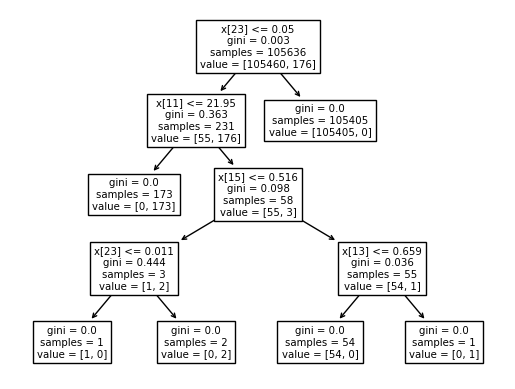

In [26]:
tree.plot_tree(clf['classifier'])

In [12]:
filtered_data = df[['H', 'diameter', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'moid', 'class']]
X_train, X_test, y_train, y_test = train_test_split(filtered_data, df['pha'], test_size=0.2)

In [23]:
X_train.dtypes

H           float64
diameter    float64
e           float64
a           float64
q           float64
i           float64
om          float64
w           float64
ma          float64
ad          float64
n           float64
tp          float64
moid        float64
class        object
dtype: object

In [24]:
def custom_combiner(feature, category):
    return str(feature) + "_" + type(category).__name__ + "_" + str(category)

In [26]:
X_train['class']

203070    MBA
748787    MBA
818869    MBA
252140    MBA
289800    MBA
         ... 
655090    IMB
420245    OMB
832829    MBA
359095    MBA
384163    MBA
Name: class, Length: 766819, dtype: object

In [35]:
X_train.head(5)

,H,diameter,e,a,q,i,om,w,ma,ad,n,tp,moid,class
203070,16.9,NaN,0.221451,2.365865,1.841942,3.025068,144.514107,228.647952,134.501891,2.889787,0.270844,2.458504e+06,0.843986,MBA
748787,16.5,NaN,0.237001,3.068242,2.341065,16.788250,169.796398,72.492420,114.625241,3.795419,0.183387,2.458375e+06,1.394320,MBA
818869,18.6,NaN,0.087061,2.189265,1.998665,2.814820,228.868033,263.255520,234.705698,2.379865,0.304268,2.459412e+06,1.015370,MBA
252140,15.1,NaN,0.239906,3.112867,2.366073,15.485566,251.963349,129.624966,238.971414,3.859662,0.179458,2.459675e+06,1.403750,MBA
289800,17.0,NaN,0.041752,2.475620,2.372259,5.518697,191.624698,9.195444,341.766711,2.578981,0.253033,2.459073e+06,1.369300,MBA


In [32]:
custom_fnames_encoder = OneHotEncoder(feature_name_combiner=custom_combiner).fit_transform(X_train[['class']])

In [33]:
custom_fnames_encoder

<766819x13 sparse matrix of type '<class 'numpy.float64'>'
	with 766819 stored elements in Compressed Sparse Row format>

In [31]:
custom_fnames_encoder.categories_

[array(['AMO', 'APO', 'AST', 'ATE', 'CEN', 'HYA', 'IEO', 'IMB', 'MBA',
        'MCA', 'OMB', 'TJN', 'TNO'], dtype=object)]

In [29]:
for i in custom_fnames_encoder.get_feature_names_out():
    print(i)

class_str_AMO
class_str_APO
class_str_AST
class_str_ATE
class_str_CEN
class_str_HYA
class_str_IEO
class_str_IMB
class_str_MBA
class_str_MCA
class_str_OMB
class_str_TJN
class_str_TNO


In [53]:
X_train.isna().sum()
len(X_train)

766819

In [55]:
len(X_train[X_train.isna().any(axis=1)])

20840

In [57]:
X_train_final = X_train.dropna(how='any', axis=0)

In [56]:
clf = clf.fit(X_train_final, y_train)

ValueError: Input contains NaN

In [39]:
clf = tree.DecisionTreeClassifier()
X_train = X_train[X_train.columns.difference(['class', 'diameter'])]

In [58]:
df = pd.read_csv('dataset.csv')
df = df[['H', 'diameter', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'moid', 'pha']]
df = df.dropna(how='any', axis=0)

/var/folders/jq/94zph4td255684v2hbsq4f340000gn/T/ipykernel_5448/990593461.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


In [68]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['pha'])], df['pha'], test_size=0.2)

In [69]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [70]:
X_train.dtypes

H           float64
a           float64
ad          float64
diameter    float64
e           float64
i           float64
ma          float64
moid        float64
n           float64
om          float64
q           float64
tp          float64
w           float64
dtype: object

In [71]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [73]:
clf.score(X_test, y_test)

0.9999621341209436

In [81]:
clf.tree_.max_depth

4

In [85]:
X_train.shape

(105636, 13)

[Text(0.6, 0.9, 'x[7] <= 0.05\ngini = 0.003\nsamples = 105636\nvalue = [105460, 176]'),
 Text(0.4, 0.7, 'x[0] <= 22.05\ngini = 0.348\nsamples = 227\nvalue = [51, 176]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 173\nvalue = [0, 173]'),
 Text(0.6, 0.5, 'x[0] <= 22.35\ngini = 0.105\nsamples = 54\nvalue = [51, 3]'),
 Text(0.4, 0.3, 'x[5] <= 2.833\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 46\nvalue = [46, 0]'),
 Text(0.8, 0.7, 'gini = 0.0\nsamples = 105409\nvalue = [105409, 0]')]

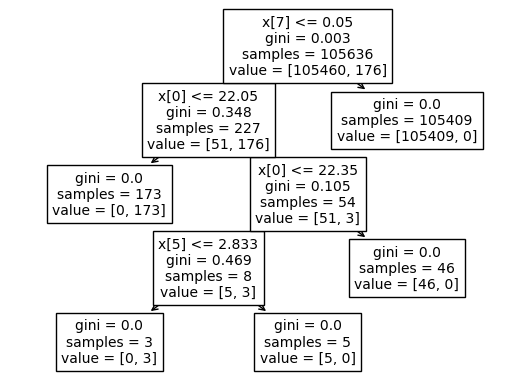

In [80]:
tree.plot_tree(clf)

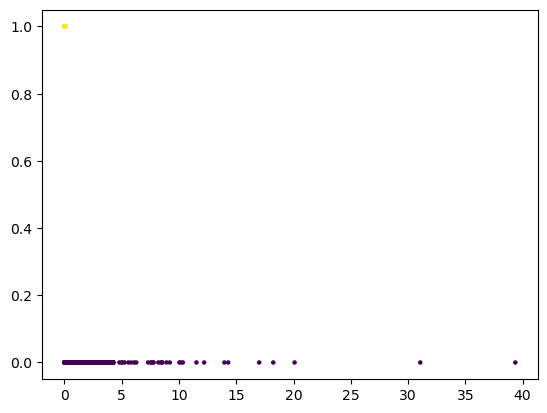

In [94]:
plt.scatter(X_train['moid'], y_train, c=y_train, s=5)
plt.show()